<a href="https://colab.research.google.com/github/benson773/churn-ann/blob/main/comassign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UPLOAD your kaggle.json file:


Saving kaggle (1).json to kaggle (1).json
Kaggle API key installed successfully!
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 60% 131M/218M [00:00<00:00, 1.37GB/s]
100% 218M/218M [00:00<00:00, 814MB/s] 
Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.9962 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 514s 

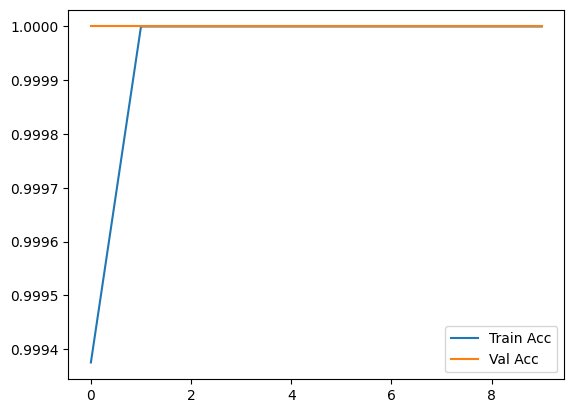

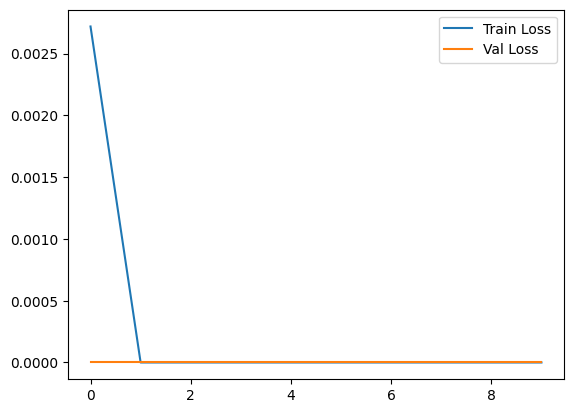

Upload an image to classify:


Saving pexels-jagheterjohann-1254140.jpg to pexels-jagheterjohann-1254140.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step

Image: pexels-jagheterjohann-1254140.jpg
Prediction: CAT 🐱


In [1]:
!pip install kaggle -q

import os, shutil
from google.colab import files

# Upload kaggle.json
print("UPLOAD your kaggle.json file:")
uploaded = files.upload()
kaggle_file = list(uploaded.keys())[0]
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move(kaggle_file, "/root/.kaggle/kaggle.json")
!chmod 600 /root/.kaggle/kaggle.json
print("Kaggle API key installed successfully!")

# Download Kaggle dataset
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q cat-and-dog.zip -d raw_data

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Use the folder structure as-is
train_dir = "/content/raw_data/training_set"
val_dir = "/content/raw_data/test_set"

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model = models.Sequential([
    layers.Input(shape=(150,150,3)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_gen, validation_data=val_gen, epochs=10)

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

print("Upload an image to classify:")
uploaded = files.upload()
for img_name in uploaded.keys():
    img = load_img(img_name, target_size=(150,150))
    img_arr = img_to_array(img)/255.0
    img_arr = np.expand_dims(img_arr, axis=0)
    pred = model.predict(img_arr)[0][0]
    print(f"\nImage: {img_name}")
    print("Prediction:", "DOG 🐶" if pred > 0.5 else "CAT 🐱")
